In [2]:
#import dependencies
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [4]:
cancer=datasets.load_breast_cancer()
X=cancer['data']
y=cancer['target']

In [15]:
def logistic(z):
    return(1+np.exp(-z))**(-1)
def standard_scaler(X):
    mean=X.mean(0)
    sd=X.std(0)
    return (X-mean)/sd

In [18]:
class BinaryLogistic:
    def fit(self, X,y,n_iter,lr, standarize=True,has_intercept=False):
        if standarize:
            X=standard_scaler(X)
        if not has_intercept:
            ones=np.ones(X.shape[0]).reshape(-1,1)
            X=np.concatenate((ones,X),axis=1)
        self.X=X
        self.y=y
        self.N, self.D=X.shape
        self.n_iter=n_iter
        self.lr=lr
        
        #calculate beta
        beta=np.random.randn(self.D)
        for i in range(n_iter):
            p=logistic(np.dot(self.X,beta))#vector of probabilities
            gradient = -np.dot(self.X.T,(self.y-p)) #gradient
            beta -= self.lr*gradient
            
        #returning values
        self.beta=beta
        self.p=logistic(np.dot(self.X,self.beta))
        self.yhat=self.p.round()

In [21]:
binary_model=BinaryLogistic()
binary_model.fit(X,y,n_iter=10**4,lr=0.0001)
print('In-sample accuracy: '  + str(np.mean(binary_model.yhat == binary_model.y)))

In-sample accuracy: 0.9894551845342706


No handles with labels found to put in legend.


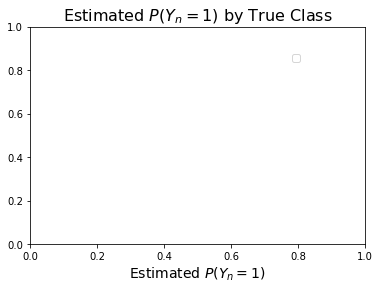

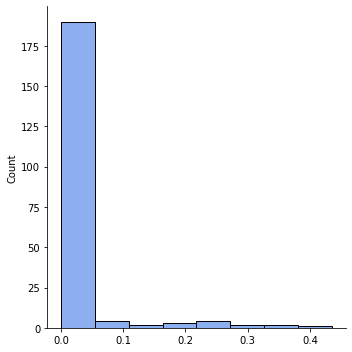

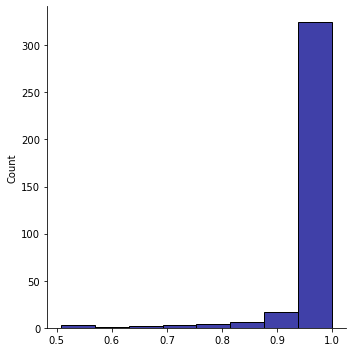

In [23]:
fig,ax=plt.subplots()
sns.displot(binary_model.p[binary_model.yhat == 0], kde = False, bins = 8, label = 'Class 0', color = 'cornflowerblue')
sns.displot(binary_model.p[binary_model.yhat == 1], kde = False, bins = 8, label = 'Class 1', color = 'darkblue')
ax.legend(loc = 9, bbox_to_anchor = (0,0,1.59,.9))
ax.set_xlabel(r'Estimated $P(Y_n = 1)$', size = 14)
ax.set_title(r'Estimated $P(Y_n = 1)$ by True Class', size = 16)
sns.despine()

Using sklearn library

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [27]:
cancer=datasets.load_breast_cancer()
X=cancer['data']
y=cancer['target']

In [29]:
binary_model=LogisticRegression(C=100000, max_iter=1e5)
binary_model.fit(X,y);

In [32]:
y_hats=binary_model.predict(X) 
p_hats=binary_model.predict_proba(X) 
print(f'Training accuracy: {binary_model.score(X, y)}')


Training accuracy: 0.9876977152899824
